In [19]:
import os
for dirname, _, filenames in os.walk('archive/images/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/images/maksssksksss702.png
archive/images/maksssksksss716.png
archive/images/maksssksksss299.png
archive/images/maksssksksss266.png
archive/images/maksssksksss500.png
archive/images/maksssksksss514.png
archive/images/maksssksksss272.png
archive/images/maksssksksss528.png
archive/images/maksssksksss312.png
archive/images/maksssksksss474.png
archive/images/maksssksksss460.png
archive/images/maksssksksss306.png
archive/images/maksssksksss448.png
archive/images/maksssksksss34.png
archive/images/maksssksksss20.png
archive/images/maksssksksss851.png
archive/images/maksssksksss689.png
archive/images/maksssksksss845.png
archive/images/maksssksksss676.png
archive/images/maksssksksss110.png
archive/images/maksssksksss104.png
archive/images/maksssksksss662.png
archive/images/maksssksksss138.png
archive/images/maksssksksss139.png
archive/images/maksssksksss105.png
archive/images/maksssksksss663.png
archive/images/maksssksksss677.png
archive/images/maksssksksss111.png
archive/images/maksssk

In [155]:
import xml.etree.ElementTree as et
import re
import pandas as pd
import matplotlib.pyplot as plt

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

img_elem = []
img_count = []

for file in os.listdir("archive/annotations"):
    row = []
    xml = et.parse("archive/annotations/"+file) 
    root = xml.getroot()
    
    img = root[1].text
    row.append(img)
    
    num_img = int(img[12:-4])
    img_count.append(num_img)
    
    h,w = root[2][0].text,root[2][1].text
    count = 0
    row.append([h,w])
    temp_img = []
    for i in range(4,len(root)):
        temp = []
        if root[i][0].text != "mask_weared_incorrect":
            
            temp.append(root[i][0].text)
            count +=1
    #         print(root[i][0].text)
            temp_img.append(root[i][0].text) 
            for point in root[i][5]:
                temp.append(point.text)
            row.append(temp)
#     img_elem.append(temp_img)
    img_elem.append(count)
    
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)
df2 = pd.DataFrame(img_elem, index=img_count)

Generating data in CSV format....


In [156]:
df2

,0
299,1
528,1
272,0
514,8
500,1
...,...
525,0
531,1
257,8
280,20


In [159]:
seriesObj = df2.apply(lambda x: True if x[0] < 40 else False, axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(len(df2)-numOfRows)

6


<AxesSubplot:>

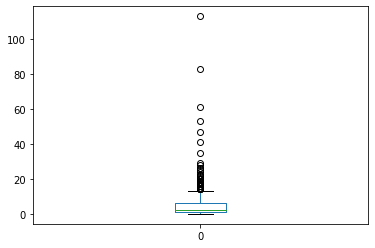

In [137]:
df2.plot.box()

In [145]:
with_mask = 0
wo_mask = 0
bad_mask = 0
for row in df2.index.values:
    for col in df2.columns:
        with_mask += 1 if df2[col][row] == "with_mask" else 0
        wo_mask += 1 if df2[col][row] == "without_mask" else 0
        bad_mask += 1 if df2[col][row] == "mask_weared_incorrect" else 0

print(with_mask/ (with_mask+wo_mask+bad_mask))
print(wo_mask/(with_mask+wo_mask+bad_mask))
print(bad_mask/(with_mask+wo_mask+bad_mask))
    

0.793713163064833
0.17608055009823181
0.030206286836935166


In [170]:
for file in os.listdir("archive/annotations"):
    row = []
    xml = et.parse("archive/annotations/"+file) 
    root = xml.getroot()
    img = root[1].text
    row.append(img)
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])

    for i in range(4,len(root)):
        temp = []
        if (root[i][0].text != "mask_weared_incorrect"):
            row.remove(img)
            temp.append(root[i][0].text)
            for point in root[i][5]:
                temp.append(point.text)
            row.append(temp)
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)

ValueError: list.remove(x): x not in list

In [169]:
df

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss299.png,"[301, 400]","[without_mask, 62, 194, 160, 320]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss528.png,"[301, 400]","[without_mask, 43, 169, 149, 308]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss272.png,"[275, 400]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss514.png,"[400, 267]","[with_mask, 28, 78, 43, 99]","[with_mask, 160, 66, 176, 83]","[with_mask, 174, 33, 186, 52]","[with_mask, 202, 40, 216, 59]","[without_mask, 237, 41, 248, 58]","[with_mask, 298, 38, 311, 54]","[with_mask, 333, 51, 346, 70]","[with_mask, 375, 47, 386, 63]",...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss500.png,"[301, 400]","[with_mask, 113, 230, 216, 368]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,maksssksksss525.png,"[600, 399]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,maksssksksss531.png,"[301, 400]","[with_mask, 92, 201, 172, 322]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1703,maksssksksss257.png,"[400, 267]","[with_mask, 4, 106, 42, 163]","[with_mask, 41, 114, 88, 163]","[with_mask, 101, 95, 143, 146]","[with_mask, 102, 17, 144, 58]","[without_mask, 24, 23, 61, 56]","[with_mask, 193, 44, 232, 95]","[with_mask, 362, 89, 399, 142]","[with_mask, 342, 34, 379, 71]",...,0,0,0,0,0,0,0,0,0,0
1704,maksssksksss280.png,"[400, 267]","[with_mask, 25, 54, 43, 72]","[with_mask, 69, 25, 82, 38]","[with_mask, 94, 68, 111, 84]","[with_mask, 142, 18, 155, 30]","[with_mask, 158, 31, 174, 48]","[with_mask, 197, 84, 218, 107]","[with_mask, 175, 15, 190, 30]","[with_mask, 201, 18, 215, 32]",...,0,0,0,0,0,0,0,0,0,0


In [178]:
df.loc[0]

image                       maksssksksss299.png
Dimensions                           [301, 400]
Object 1      [without_mask, 62, 194, 160, 320]
Object 2                                      0
Object 3                                      0
                            ...                
Object 111                                    0
Object 112                                    0
Object 113                                    0
Object 114                                    0
Object 115                                    0
Name: 0, Length: 117, dtype: object